In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from maxima import findLocalMaximaMinima
import scipy.signal
import scipy
import librosa 
import IPython.display as ipd
from detect_peaks import detect_peaks

In [17]:
#Load a .wav file
x, sr = librosa.load('D:\\Programowanie\\AI\\editor\\data\\samples\\inputs\\temple_of_love-sisters_of_mercy.wav')
# x, sr = librosa.load('D:\\Programowanie\\AI\\editor\\data\\samples\\inputs\\file_example_WAV_1MG.wav')

print('x length = {}'.format(len(x)))
print('sample rate = {}'.format(sr))
print('sound clip is {} seconds long' .format(int((len(x)/sr))))

x length = 10752763
sample rate = 22050
sound clip is 487 seconds long


In [18]:
#np.array of seconds
t = np.array(range(0, len(x))) /sr
print(t)

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 4.87653515e+02
 4.87653560e+02 4.87653605e+02]


Text(0, 0.5, 'Pressure')

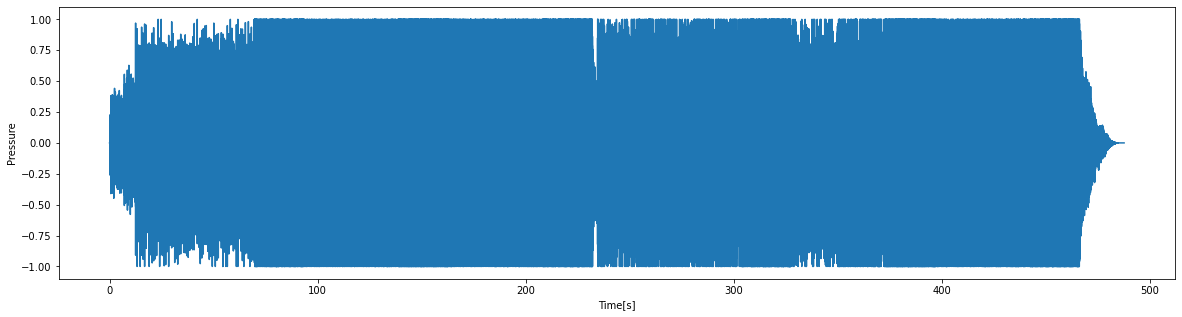

In [19]:
plt.figure(figsize=(20,5))
plt.plot(t,x)
plt.xlabel('Time[s]')
plt.ylabel('Pressure')

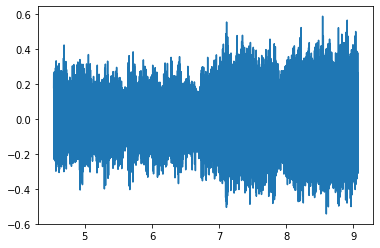

In [20]:
plt.plot(t[100000:200000], x[100000:200000])

In [21]:
#compute the FFT
fhat = np.fft.fft(x)

In [22]:
print("Biggest value in fft {}".format(max(abs(fhat))))
print("Samllest value in fft {}".format(min(abs(fhat))))
print('Median of power {}'.format(np.median(abs(fhat))))

Biggest value in fft 167370.9728383882
Samllest value in fft 0.07291743148066988
Median of power 306.8761573940169


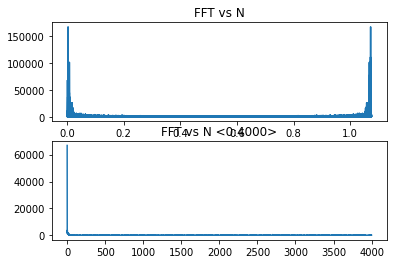

In [23]:
fig,axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.title('FFT vs N')
plt.plot(abs(fhat))
plt.sca(axs[1])
plt.title('FFT vs N <0:4000>')
plt.plot(abs(fhat[0:4000]))

Text(0, 0.5, 'Power Db')

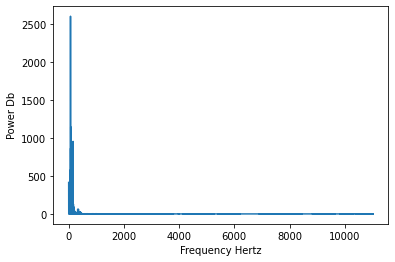

In [24]:
#plot PSD
PSD = fhat * np.conj(fhat)/len(x)
L = int(len(x)/2)
freqs = (1/(t[1]*len(t))) * np.arange(len(t))
plt.plot(freqs[0:L],PSD[0:L])
plt.xlabel('Frequency Hertz')
plt.ylabel('Power Db')

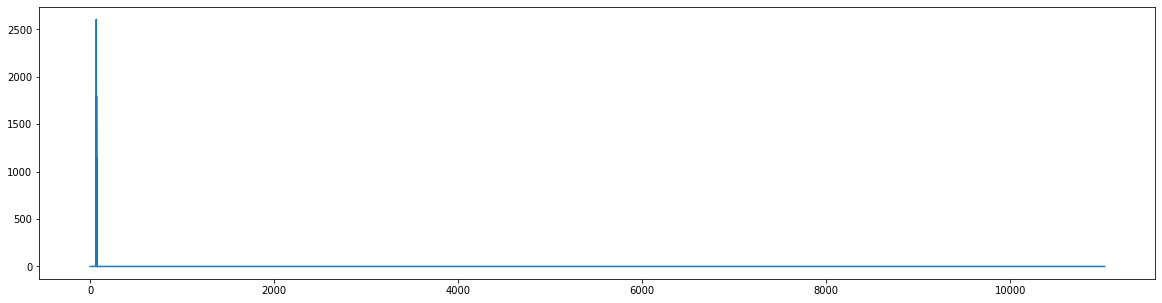

In [25]:
indices = PSD >1000  #find dominant sound
PSDclean = PSD * indices #zero out all other
fhat = indices * fhat
# i = 0
# for indx in indices:
#     if(indx == False):
#         i = i+1
# print(i)
ffilt = np.fft.ifft(fhat)
plt.figure(figsize=(20,5))
plt.plot(freqs[0:L],PSDclean[0:L])



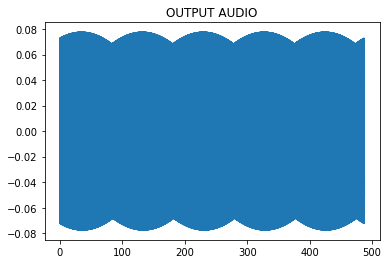

In [26]:
plt.title('OUTPUT AUDIO')
plt.plot(t,ffilt)


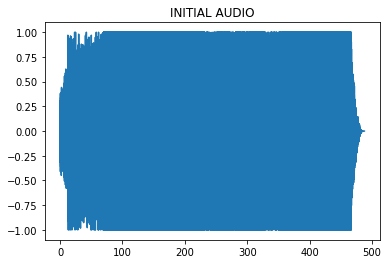

In [27]:
plt.title('INITIAL AUDIO')
plt.plot(t,x)

In [28]:
    #indeksy sub_bassowych czestotliwosc
    # print("\nThe len of sub_bass is equal to {}".format(len(sub_bass_indices)))
    # print("The length of audio is = {}".format(len(x)))
    # print("filtered sound is {:.1%} of the original".format(len(sub_bass_indices)/len(x)))
    # print("\nThe value of first five indices is = {}".format(sub_bass_indices[0:5]))
    # local_maximas = findLocalMaximaMinima(len(sub_bass_indices),sub_bass_indices)

In [29]:
    # audio = [(idx,val) for idx,val in enumerate(abs(ffilt))]
    # local_maximas = findLocalMaximaMinima(len(audio),audio)
    # print("The length of audio is = {}".format(len(local_maximas)))
    # test_output = np.zeros(len(x))
    # sorted_by_val = sorted(local_maximas, key=lambda tup: tup[1])
    # sorted_by_val = sorted_by_val[0:400]
    # print(test_output)
    # for maximum in sorted_by_val:
    #     index = maximum[0]
    #     value = 100
    #     test_output[index] = value
    
    # m = np.max(np.abs(test_output))
    # sigf32 = (test_output/m).astype(np.float32)
    # write("audio_output.wav", sr , sigf32)
    # plt.plot(test_output,sigf32) 
         



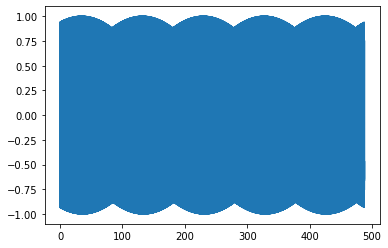

In [30]:
#IFFT AUDIO
m = np.max(np.abs(ffilt))
sigf32 = (ffilt/m).astype(np.float32)
write("D:\\Programowanie\\AI\editor\\data\\samples\\outputs\\fft_output.wav", sr , sigf32)
plt.plot(t,sigf32)
